In [85]:
import fastf1
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable FastF1 cache
fastf1.Cache.enable_cache('../data/raw')

# Load 2025 Hungarian GP Qualifying
quali = fastf1.get_session(2025, 'Hungary', 'Q')
quali.load()

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '63', '14', '18', '5', '1', '30', '6', '87', '44', '55', '43', '12', '22', '10', '31', '27', '23']


In [86]:
laps = quali.laps.pick_quicklaps().pick_drivers(['LEC', 'PIA', 'NOR', 'ALO', 'RUS'])
fastest_laps = laps.groupby('Driver').apply(lambda x: x.loc[x['LapTime'].idxmin()])

df = fastest_laps[["Driver", "Sector1Time", "Sector2Time", "Sector3Time", "LapTime"]].copy()

df["Sector1Time"] = df["Sector1Time"].dt.total_seconds()
df["Sector2Time"] = df["Sector2Time"].dt.total_seconds()
df["Sector3Time"] = df["Sector3Time"].dt.total_seconds()
df["LapTime"] = df["LapTime"].dt.total_seconds()

df = df.reset_index(drop=True)
print(df)

  Driver  Sector1Time  Sector2Time  Sector3Time  LapTime
0    ALO       27.523       26.529       21.229   75.281
1    LEC       27.541       26.453       21.378   75.372
2    NOR       27.443       26.396       21.051   74.890
3    PIA       27.555       26.374       21.012   74.941
4    RUS       27.496       26.494       21.211   75.201


C:\Users\Morokom\AppData\Local\Temp\ipykernel_4408\3184108312.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [87]:
print(quali.car_data)

{'16':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0     2025-08-02 13:47:20.361  0.0    0.0      0       0.0  False    0    car   
1     2025-08-02 13:47:20.521  0.0    0.0      0       0.0  False    0    car   
2     2025-08-02 13:47:20.761  0.0    0.0      0       0.0  False    0    car   
3     2025-08-02 13:47:20.921  0.0    0.0      0       0.0  False    0    car   
4     2025-08-02 13:47:21.121  0.0    0.0      0       0.0  False    0    car   
...                       ...  ...    ...    ...       ...    ...  ...    ...   
17502 2025-08-02 15:05:30.056  0.0    0.0      0     104.0   True    8    car   
17503 2025-08-02 15:05:30.256  0.0    0.0      0     104.0   True    8    car   
17504 2025-08-02 15:05:30.417  0.0    0.0      0     104.0   True    8    car   
17505 2025-08-02 15:05:30.697  0.0    0.0      0     104.0   True    8    car   
17506 2025-08-02 15:05:30.897  0.0    0.0      0     104.0   True    8    car   

                    

In [88]:
print(quali.pos_data)

{'16':                          Date   Status       X       Y       Z Source  \
0     2025-08-02 13:46:24.474  OnTrack -3520.0  1751.0     0.0    pos   
1     2025-08-02 13:46:24.714  OnTrack -3520.0  1751.0     0.0    pos   
2     2025-08-02 13:46:24.874  OnTrack -3520.0  1751.0     0.0    pos   
3     2025-08-02 13:46:25.174  OnTrack -3520.0  1751.0     0.0    pos   
4     2025-08-02 13:46:25.394  OnTrack -3520.0  1751.0     0.0    pos   
...                       ...      ...     ...     ...     ...    ...   
18247 2025-08-02 15:06:22.550  OnTrack -1359.0   -19.0  2381.0    pos   
18248 2025-08-02 15:06:22.750  OnTrack -1359.0   -19.0  2381.0    pos   
18249 2025-08-02 15:06:22.910  OnTrack -1359.0   -19.0  2381.0    pos   
18250 2025-08-02 15:06:23.170  OnTrack -1359.0   -19.0  2381.0    pos   
18251 2025-08-02 15:06:23.370  OnTrack -1359.0   -19.0  2381.0    pos   

                        Time            SessionTime  
0     0 days 00:00:01.587000 0 days 00:00:01.587000  
1     0 

In [89]:
from fastf1 import plotting
plotting.setup_mpl()

drivers = ['16', '4', '81']  # Leclerc, Norris, Piastri

fastest_laps = {}
for drv in drivers:
    laps = quali.laps.pick_drivers([drv])  
    fastest_lap = laps.pick_fastest()
    fastest_laps[drv] = fastest_lap

for drv, lap in fastest_laps.items():
    print(f"Driver {drv} — Lap time: {lap['LapTime']}, Sector 1: {lap['Sector1Time']}, Sector 2: {lap['Sector2Time']}, Sector 3: {lap['Sector3Time']}")


Driver 16 — Lap time: 0 days 00:01:15.372000, Sector 1: 0 days 00:00:27.541000, Sector 2: 0 days 00:00:26.453000, Sector 3: 0 days 00:00:21.378000
Driver 4 — Lap time: 0 days 00:01:14.890000, Sector 1: 0 days 00:00:27.443000, Sector 2: 0 days 00:00:26.396000, Sector 3: 0 days 00:00:21.051000
Driver 81 — Lap time: 0 days 00:01:14.941000, Sector 1: 0 days 00:00:27.555000, Sector 2: 0 days 00:00:26.374000, Sector 3: 0 days 00:00:21.012000


In [90]:
telemetry = {}
for drv in drivers:
    telemetry[drv] = fastest_laps[drv].get_car_data().add_distance()

telemetry


{'16':                        Date      RPM  Speed  nGear  Throttle  Brake  DRS  \
 0   2025-08-02 15:00:18.016  10884.0  273.0      7     100.0  False   12   
 1   2025-08-02 15:00:18.175  11008.0  275.0      7     100.0  False   12   
 2   2025-08-02 15:00:18.535  11204.0  280.0      7     100.0  False   12   
 3   2025-08-02 15:00:18.855  11333.0  283.0      7     100.0  False   12   
 4   2025-08-02 15:00:19.175  11521.0  287.0      7     100.0  False   12   
 ..                      ...      ...    ...    ...       ...    ...  ...   
 269 2025-08-02 15:01:31.936  11145.0  242.0      6     100.0  False   12   
 270 2025-08-02 15:01:32.175  11416.0  248.0      6     100.0  False   12   
 271 2025-08-02 15:01:32.495  11679.0  254.0      6     100.0  False   12   
 272 2025-08-02 15:01:32.935  10419.0  263.0      7     100.0  False   12   
 273 2025-08-02 15:01:33.135  10725.0  264.0      7     100.0  False   12   
 
     Source                   Time            SessionTime     Distan

In [91]:
from fastf1 import plotting
from fastf1.api import Cache
import fastf1.plotting
import matplotlib.pyplot as plt

Cache.enable_cache('../data/raw')  
drivers = ['16', '4', '81']  # Leclerc, Norris, Piastri,

telemetry_data = {}

for drv in drivers:
    fastest_lap = quali.laps.pick_drivers([drv]).pick_fastest()
    
    # Load telemetry
    tel = fastest_lap.get_car_data().add_distance()
    telemetry_data[drv] = {
        'telemetry': tel,
        'lap_time': fastest_lap['LapTime'],
        'team': fastest_lap['Team'],
        'driver_num': drv
    }


In [92]:
print(telemetry_data['16']['telemetry'].columns)

Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Time', 'SessionTime', 'Distance'],
      dtype='object')


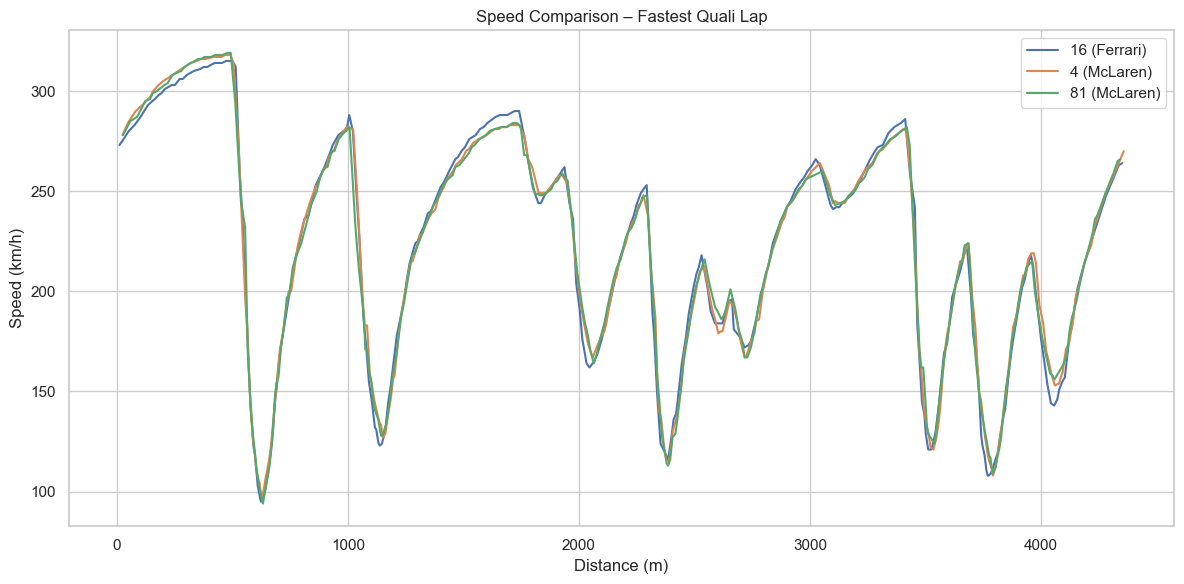

In [95]:
plt.figure(figsize=(12, 6))


for drv in drivers:
    tel = telemetry_data[drv]['telemetry']
    plt.plot(tel['Distance'], tel['Speed'], label=f"{drv} ({telemetry_data[drv]['team']})")

plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison – Fastest Quali Lap')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd

all_data = []

for drv in drivers:
    tel = telemetry_data[drv]['telemetry']
    df = tel[['Distance', 'Speed', 'Throttle', 'Brake', 'nGear', 'RPM']].copy()
    df['Driver'] = drv
    all_data.append(df)

tele_df = pd.concat(all_data)


In [60]:

sampled_df = tele_df.groupby("Driver").apply(lambda x: x.sample(n=200, random_state=42)).reset_index(drop=True)

C:\Users\Morokom\AppData\Local\Temp\ipykernel_4408\1489713585.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = tele_df.groupby("Driver").apply(lambda x: x.sample(n=200, random_state=42)).reset_index(drop=True)


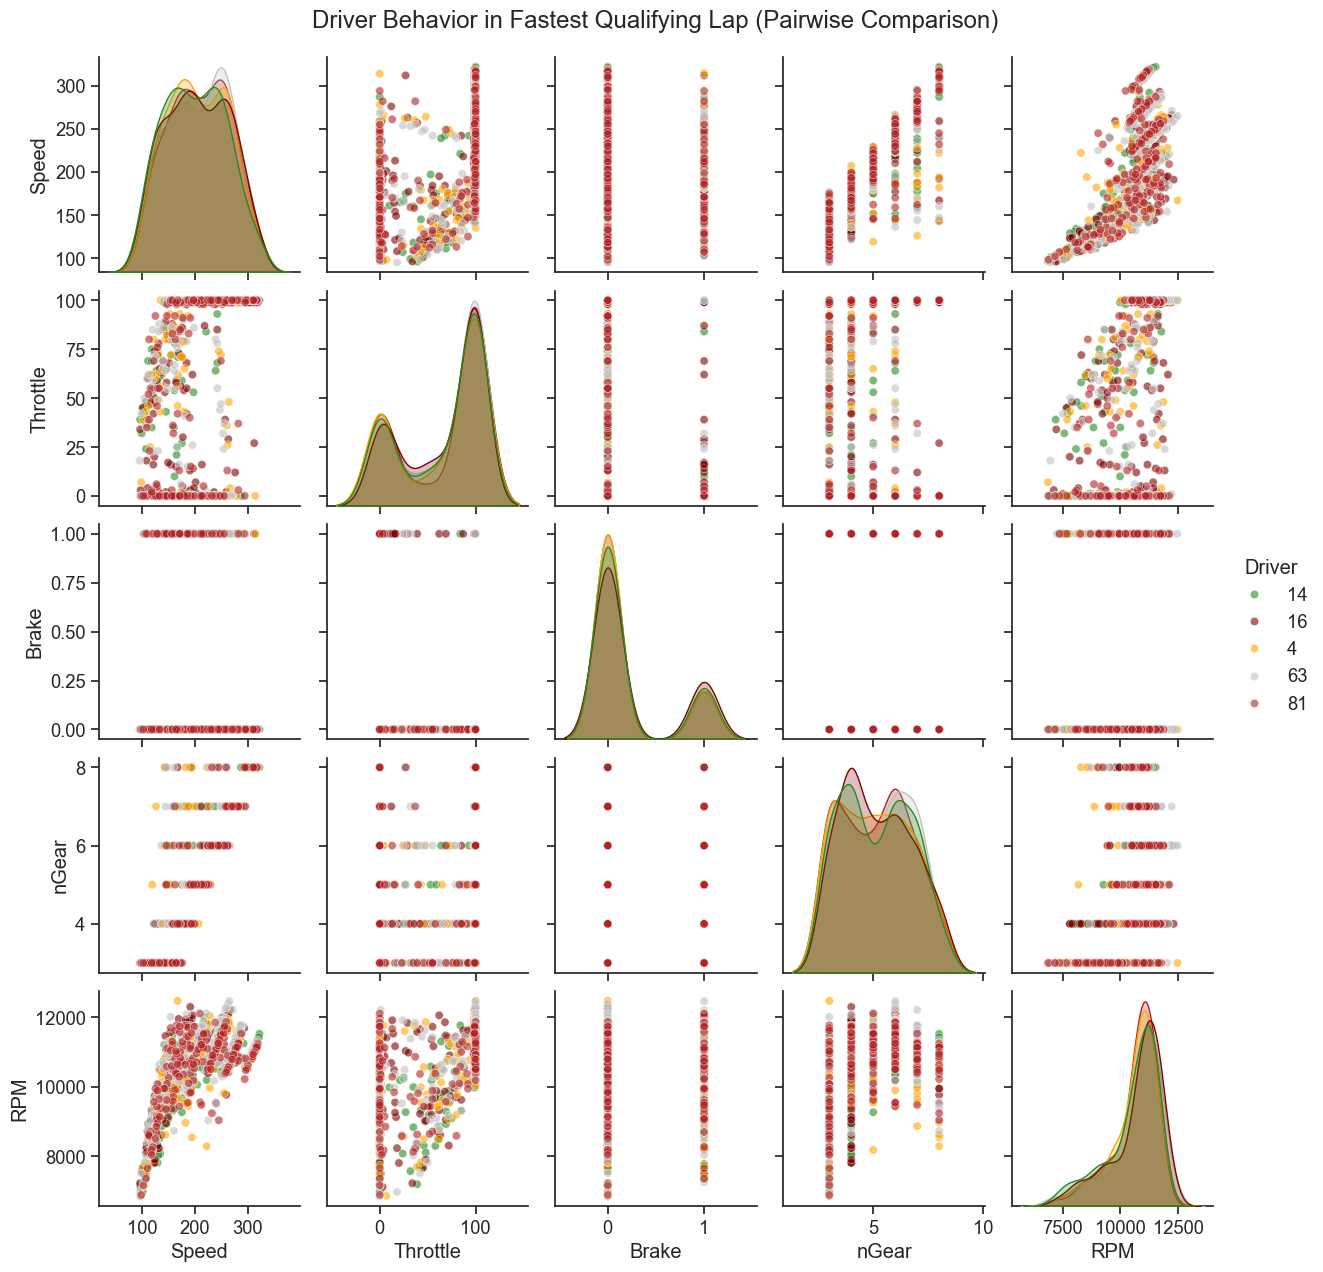

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

driver_colors = {
    "4": "orange",         # Norris
    "81": "firebrick",     # Piastri
    "16": "maroon",        # Leclerc
    "14": "forestgreen",   # Alonso
    "63": "silver"         # Russell
}

sns.set(style="ticks", font_scale=1.2)

pair_plot = sns.pairplot(
    sampled_df,
    hue="Driver",
    vars=["Speed", "Throttle", "Brake", "nGear", "RPM"],
    palette=driver_colors,
    plot_kws={"alpha": 0.6}
)

pair_plot.fig.suptitle("Driver Behavior in Fastest Qualifying Lap (Pairwise Comparison)", y=1.02)
plt.show()


d:\FullStack\F1Predictor\venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
d:\FullStack\F1Predictor\venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
d:\FullStack\F1Predictor\venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
d:\FullStack\F1Predictor\venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
d:\FullStack\F1Predictor\venv\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\Morokom\AppData\Local\Temp\ipykernel_4408\1847509948.py:42: UserWarning: No artists with labels found to put in legend.  

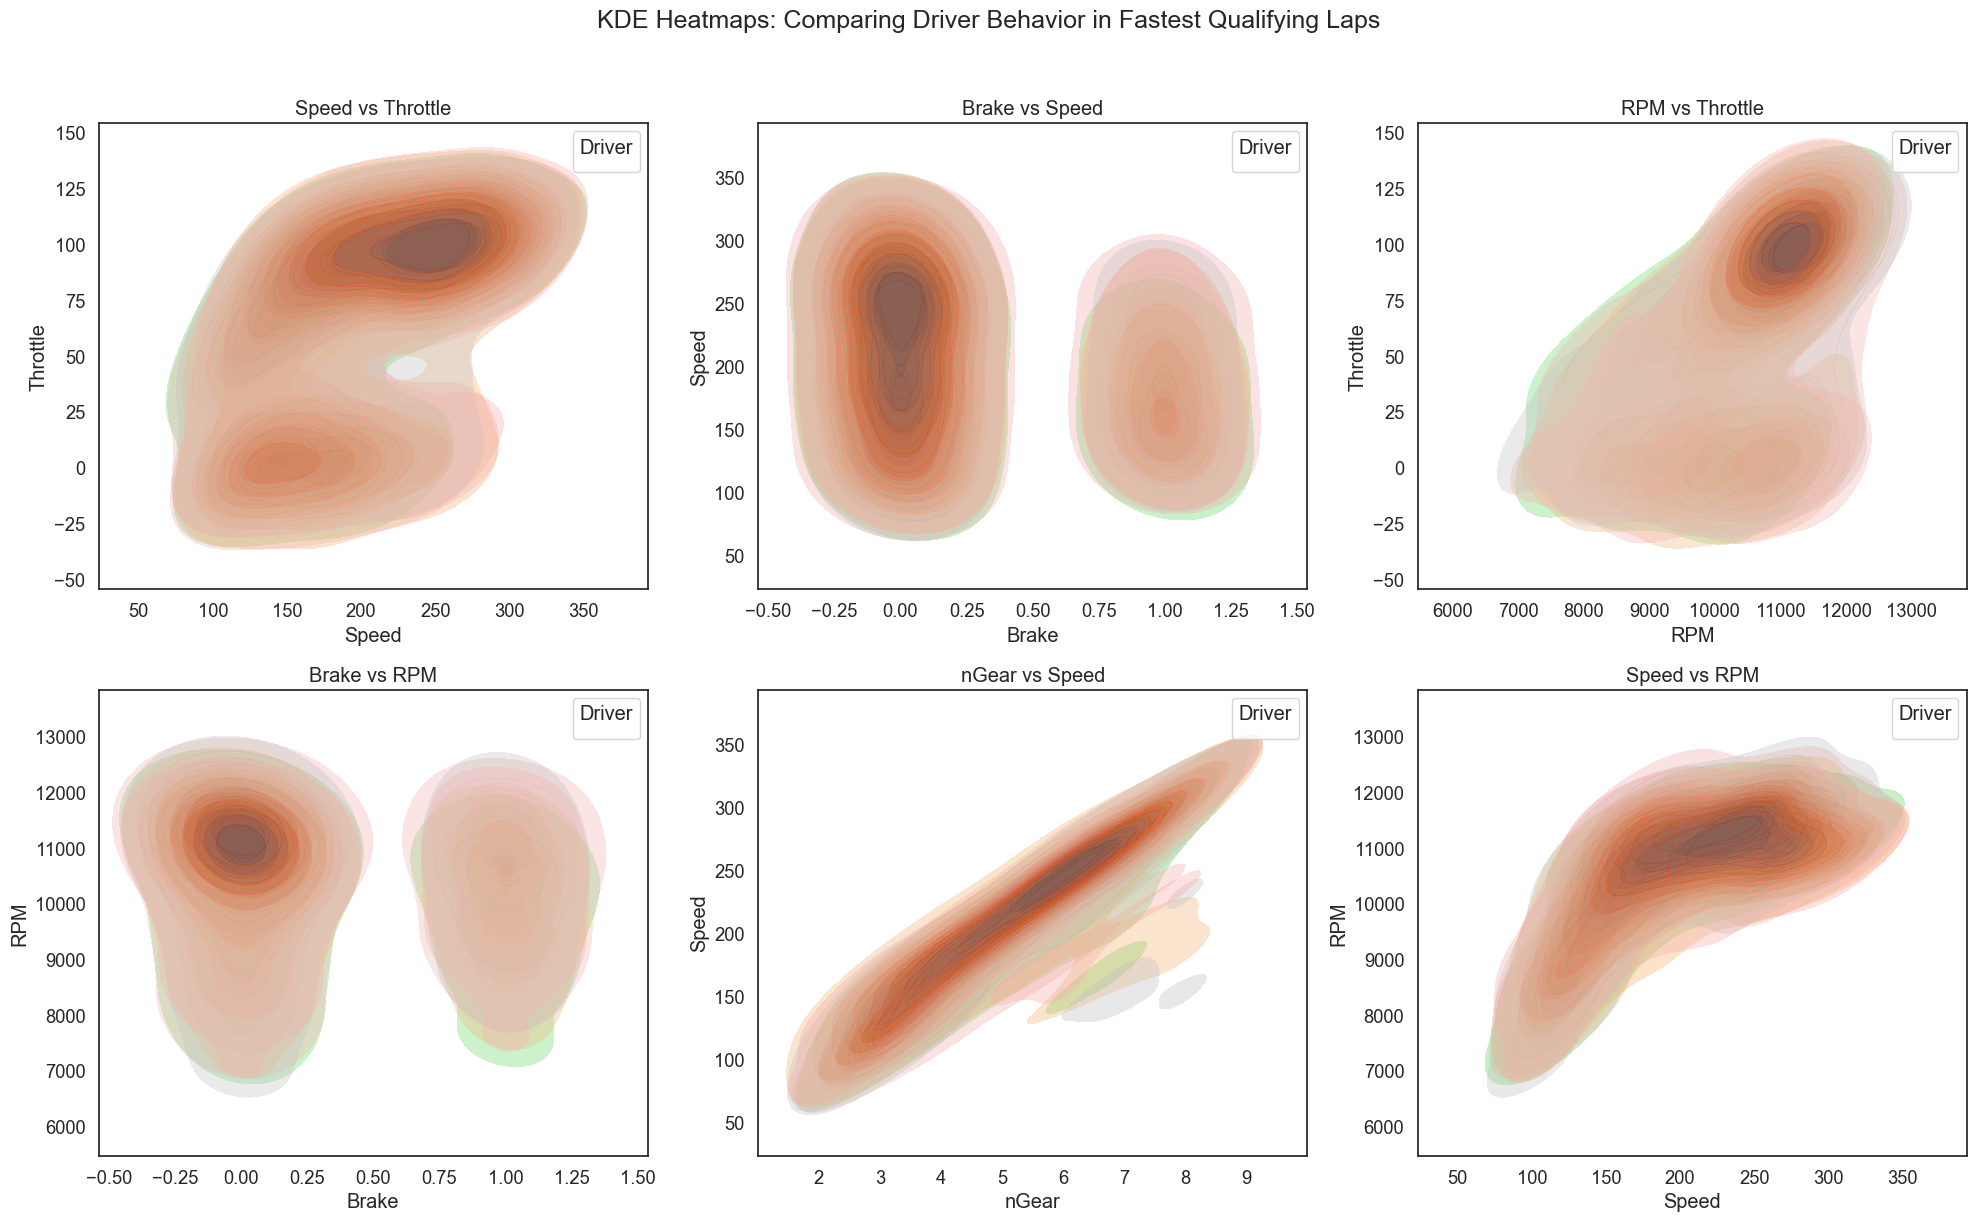

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.2)

driver_colors = {
    "4": "orange",       # Norris
    "81": "orangered",   # Piastri
    "16": "maroon",      # Leclerc
    "14": "forestgreen", # Alonso
    "63": "silver"       # Russell
}

feature_pairs = [
    ("Speed", "Throttle"),
    ("Brake", "Speed"),
    ("RPM", "Throttle"),
    ("Brake", "RPM"),
    ("nGear", "Speed"),
    ("Speed", "RPM")
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for ax, (x_feat, y_feat) in zip(axes, feature_pairs):
    for drv in sampled_df["Driver"].unique():
        subset = sampled_df[sampled_df["Driver"] == drv]
        sns.kdeplot(
            data=subset,
            x=x_feat,
            y=y_feat,
            fill=True,
            alpha=0.35,
            linewidth=1,
            label=f"Driver {drv}",
            color=driver_colors.get(drv, None),
            ax=ax,
            warn_singular=False
        )
    ax.set_title(f"{x_feat} vs {y_feat}")
    ax.legend(title="Driver", loc="upper right", fontsize='small')

plt.suptitle("KDE Heatmaps: Comparing Driver Behavior in Fastest Qualifying Laps", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


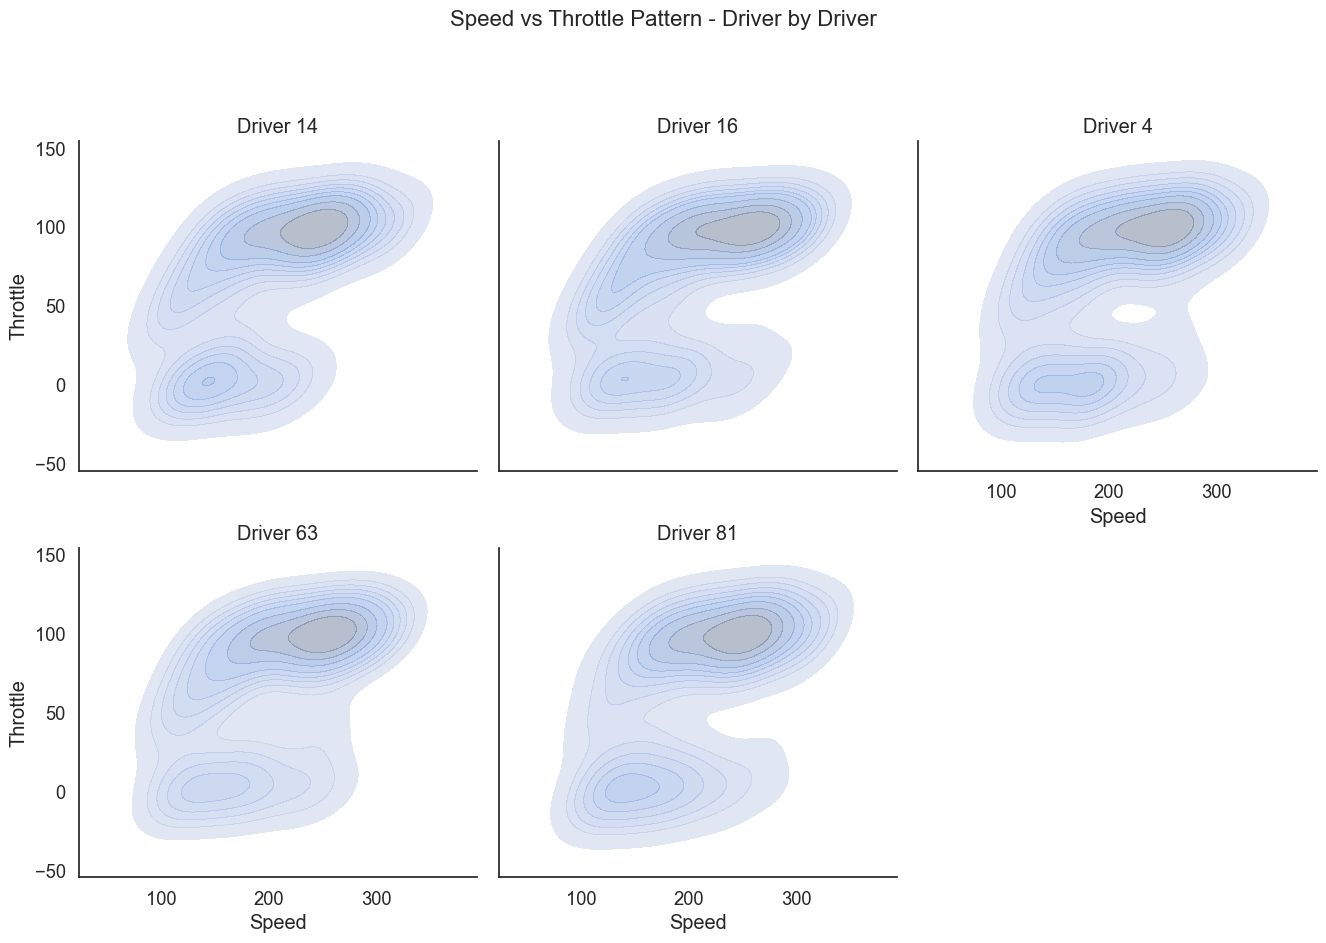

In [68]:
g = sns.FacetGrid(sampled_df, col="Driver", col_wrap=3, height=4.5, palette=driver_colors)
g.map_dataframe(sns.kdeplot, x="Speed", y="Throttle", fill=True, alpha=0.4, warn_singular=False)
g.set_titles("Driver {col_name}")
g.fig.suptitle("Speed vs Throttle Pattern - Driver by Driver", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


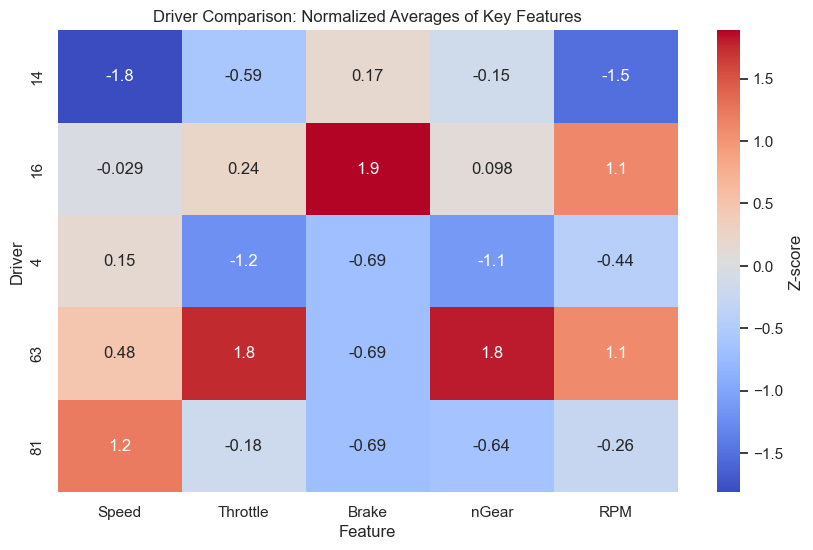

In [84]:
features = ["Speed", "Throttle", "Brake", "nGear", "RPM"]
mean_stats = sampled_df.groupby("Driver")[features].mean()

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(mean_stats)
scaled_df = pd.DataFrame(scaled, index=mean_stats.index, columns=features)

plt.figure(figsize=(10, 6))
sns.heatmap(scaled_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Z-score'})
plt.title("Driver Comparison: Normalized Averages of Key Features")
plt.xlabel("Feature")
plt.ylabel("Driver")
plt.show()
